In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/twitter_training.csv")
train_data.columns = ["number","place","intensity","description"]
train_data.head()

,number,place,intensity,description
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
validation_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/twitter_validation.csv")
validation_data.columns = ["number","place","intensity","description"]
validation_data.head()

,number,place,intensity,description
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
len(train_data),len(validation_data)

(74681, 999)

In [ ]:
train_df_shuffled = train_data.sample(frac=1, random_state=42)
train_df_shuffled.head()

,number,place,intensity,description
34877,6792,Fortnite,Irrelevant,went to go in george's room to find his door w...
21704,4115,CS-GO,Positive,Yo this looks LIT! Team:GO/Overwatch combo
47008,5665,HomeDepot,Negative,Pay attention executive administrators. While ...
7969,9369,Overwatch,Irrelevant,Guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one


In [ ]:
train_data2 = train_data.dropna()
train_data2["intensity"].value_counts()

intensity
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [ ]:
mask = train_data2["intensity"] != "Irrelevant"
mask1 = train_data2["intensity"] != "Neutral"
train_data_filtered = train_data2[mask]
train_data_filtered = train_data_filtered[mask1]
train_data_filtered["intensity"].value_counts()

<ipython-input-8-ba4073aa2cbd>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_data_filtered = train_data_filtered[mask1]


intensity
Negative    22358
Positive    20654
Name: count, dtype: int64

In [ ]:
mapping = {'Positive': 1, 'Negative': 0,}

train_data_filtered['intensity'] = train_data_filtered['intensity'].replace(mapping)

train_data_filtered["intensity"].value_counts()

intensity
0    22358
1    20654
Name: count, dtype: int64

In [ ]:
train_data_filtered = train_data_filtered.sample(frac=1, random_state=42)
train_data_filtered.head()

,number,place,intensity,description
61849,5003,GrandTheftAuto(GTA),0,This COD GON will take a long time as hell to ...
63273,7645,MaddenNFL,0,Thomas @EAMaddenNFL whoever made it so that al...
49070,6024,FIFA,0,"mfs be 17 in the training facilities of fifa, ..."
23274,4390,CS-GO,1,Best night of pugging CSGO. Enormous ELO gains...
44387,11625,Verizon,1,9.6 @CharityMiles for @alzassociation. Thanks ...


In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data_filtered["description"].to_numpy(),
                                                                            train_data_filtered["intensity"].to_numpy(),
                                                                            test_size=0.2,
                                                                            random_state=42)

In [ ]:
train_sentences[:10]

array(['I HATE borderlands 3 Rhys WHY heck does he almost look up like that this is probably not really the beautiful disaster twink I love',
       "If anything, I'm immediately more pleased for Assassin's Creed Valhalla.",
       'Funny how this issue is so not like HUGE during this pandemic. In fact, it only states here that T - mobile is affected but otherwise I certainly ’ m obviously a Verizon customer and I certainly can promise ’ t even hit call out...',
       '5... “.. on.com/2020/07/23/lea...', 'GOAT 17',
       '@ Rainbow6Game fixes squat spamming',
       'Yet another reason to hate the Super Falcons and Arthur Blank.',
       "BF6 modern era, Bad Boy 3 with the back. Dice and EA have to work all out for this next game as far as I'm knowledge. BFV still not gonna get anymore friends from here on up think. I understand they've already done their losses.",
       'About Assassin Paul ’ s Creed : Narcos.. The Sounds pretty cool actually!',
       ' '], dtype=object)

In [ ]:
train_labels[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

## Model formulation and construction


In [ ]:
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 30000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
An epic gamer moment      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  58,  445, 1430,  788,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 22551
Top 5 most common words: ['', '[UNK]', 'the', 'i', 'to']
Bottom 5 least common words: ['00pm', '0023', '00105', '00014', '00011']


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2_embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_2"
)

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)

x = layers.LSTM(64)(x)
print(x.shape)

x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


(None, 15, 128)
(None, 64)


In [ ]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

--2024-06-01 12:43:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-06-01 12:43:28 (15.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240601-124328
Epoch 1/10
1076/1076 [==============================] - 27s 20ms/step - loss: 0.3649 - accuracy: 0.8310 - val_loss: 0.2485 - val_accuracy: 0.8942
Epoch 2/10
1076/1076 [==============================] - 11s 10ms/step - loss: 0.1740 - accuracy: 0.9265 - val_loss: 0.2005 - val_accuracy: 0.9140
Epoch 3/10
1076/1076 [==============================] - 12s 11ms/step - loss: 0.1104 - accuracy: 0.9524 - val_loss: 0.2027 - val_accuracy: 0.9183
Epoch 4/10
1076/1076 [==============================] - 9s 9ms/step - loss: 0.0806 - accuracy: 0.9622 - val_loss: 0.2350 - val_accuracy: 0.9191
Epoch 5/10
1076/1076 [==============================] - 12s 11ms/step - loss: 0.0657 - accuracy: 0.9691 - val_loss: 0.2210 - val_accuracy: 0.9217
Epoch 6/10
1076/1076 [==============================] - 11s 11ms/step - loss: 0.0550 - accuracy: 0.9736 - val_loss: 0.2299 - val_accuracy: 0.9267
Epoch 7/10
1076/1076 [==============================] - 10s 9

Text(0, 0.5, 'loss')

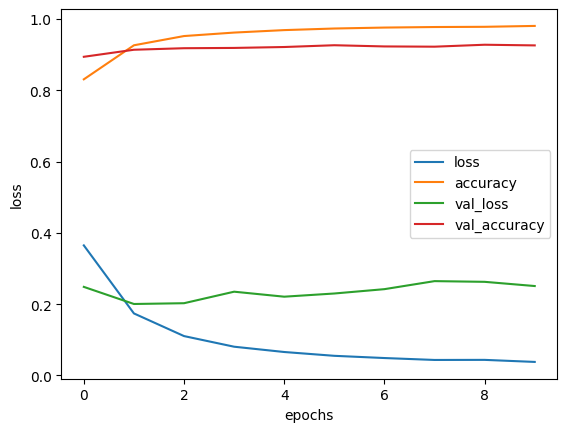

In [ ]:
pd.DataFrame(model_2_history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

Above we have preprocessed the data set and have removed all the occurance of neutral and negative feedback and thereby converted the sentiment analysis process into a binary classification wherein the model predicts whether the given text is a positive or a negative sentiment and the model has acheived an accuracy of 93%

In [ ]:
train_data2.head()

,number,place,intensity,description
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
train_data2["intensity"].value_counts()

intensity
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

mapping the values of intensity to its coresponding numerals -
0 - Irrelevant
1 - Neutral
2 - Negative
3 - Positive

In [ ]:
mapping = {'Irrelevant': 0, 'Neutral': 1, 'Negative': 2,'Positive': 3}
train_data2['intensity'] = train_data2['intensity'].replace(mapping)
train_data2["intensity"].value_counts()

<ipython-input-25-504dd209855d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data2['intensity'] = train_data2['intensity'].replace(mapping)


intensity
2    22358
3    20654
1    18108
0    12875
Name: count, dtype: int64

In [ ]:
train_data_filtered = train_data2.sample(frac=1, random_state=42)
train_data_filtered.head()

,number,place,intensity,description
61734,4984,GrandTheftAuto(GTA),0,Do you think you can hurt me?
11260,13136,Xbox(Xseries),3,About The time!!
55969,11207,TomClancysRainbowSix,1,Calls from _ z1rv _ & @ Tweet98 got me this so...
4111,1909,CallOfDutyBlackopsColdWar,2,So CoD: Black Ops Cold War is gonna be ass? @ ...
2308,1604,CallOfDutyBlackopsColdWar,2,Y HAPPY ABOUT THIS.


In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data_filtered["description"].to_numpy(),
                                                                            train_data_filtered["intensity"].to_numpy(),
                                                                            test_size = 0.2,
                                                                            random_state = 42)


In [ ]:
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels),train_labels.shape

(59196, 59196, 14799, 14799, (59196,))

In [ ]:
train_sentences[:10], train_labels[:10]

(array(["I haven't bought Madden in 4 years but I'm buying this one fam! Congratulations!!! Hard work pays off!!!!",
        'If it just takes "a few of days" for Android developers to recompile existing x86 intel based apps for iOS that\'s good. I expect Microsoft & Adobe are in the category that takes a bit longer. Happy to hear they\'re already working on it!',
        'I love seeing Naughty Dog fanboys squirm every time Cyberpunk 2077 gets brought up. They are desperate for it to fail, it’s pathetic. https://t.co/WrII1g5jDs',
        "@PUBG_Support Hiya! So when'll u be fixing your f'n console game? Been asking a lot and have been very satisfied with your lack of responses .  Just wondering if lagouts are a part of the game like red zones and I'm just not aware or if you just can't fix a 2 year + problem. Thx!",
        'Freight team did a awesome job recovering A/c and fans .. great weekend with sales !!! ',
        '... store.playstation.com /',
        '4 games 4 tags.. 1. Dota 

In [ ]:
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 50000
max_length = 20

text_vectorization = TextVectorization(max_tokens = max_vocab_length,
                                       output_mode = "int",
                                       output_sequence_length = max_length)

In [ ]:
text_vectorization.adapt(train_sentences)

In [ ]:
# printing the token of a random sentence -
import random
random_sentence = random.choice(train_sentences)
print(f"Text of the sentence - {random_sentence}")
print("its vecoritzed form is - ")
print(text_vectorization(random_sentence))

Text of the sentence - I swear to god @CDPROJEKTRED and the team making are  awesome developers, they<unk> always been incredibly community friendly especially with the free content for witcher 3 this is one devs we need to be supporting more of absolutely love them. Excited for Cyberpunk cant wait!
its vecoritzed form is - 
tf.Tensor(
[    3  1251     4   320  2886     5     2   167   317    25   271  1003
 22279   199    71  1321   417  1640   751    17], shape=(20,), dtype=int64)


In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 22551
Top 5 most common words: ['', '[UNK]', 'the', 'i', 'to']
Bottom 5 least common words: ['00pm', '0023', '00105', '00014', '00011']


In [ ]:
from tensorflow.keras import regularizers

In [ ]:
#model construction -
tf.random.set_seed(42)
model_embedding = layers.Embedding(
    input_dim = max_vocab_length,
    output_dim =512,
      embeddings_initializer="uniform",
    input_length = max_length,
    name = "LSTM_embedding"

)
inputs = layers.Input(shape=(1,),dtype = "string")
x = text_vectorizer(inputs)
x = model_embedding(x)

x = layers.LSTM(128,return_sequences = True)(x)
x = layers.LSTM(64)(x)

x = layers.Dense(256,activation="relu",kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.01))(x)


outputs = layers.Dense(4,activation="softmax")(x)

model_lstm = tf.keras.Model(inputs,outputs,name = "model_lstm")

In [ ]:
model_lstm.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [ ]:

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

--2024-06-01 12:46:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-01 12:46:00 (41.2 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
history_model_lstm = model_lstm.fit(train_sentences,train_labels,epochs = 8,
                                    validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240601-130230
Epoch 1/8
1850/1850 [==============================] - 32s 17ms/step - loss: 0.0649 - accuracy: 0.9747 - val_loss: 0.6262 - val_accuracy: 0.8693
Epoch 2/8
1850/1850 [==============================] - 31s 17ms/step - loss: 0.0643 - accuracy: 0.9747 - val_loss: 0.6263 - val_accuracy: 0.8673
Epoch 3/8
1850/1850 [==============================] - 31s 17ms/step - loss: 0.0635 - accuracy: 0.9747 - val_loss: 0.6597 - val_accuracy: 0.8667
Epoch 4/8
1850/1850 [==============================] - 34s 19ms/step - loss: 0.0647 - accuracy: 0.9743 - val_loss: 0.6166 - val_accuracy: 0.8688
Epoch 5/8
1850/1850 [==============================] - 32s 17ms/step - loss: 0.0639 - accuracy: 0.9746 - val_loss: 0.6065 - val_accuracy: 0.8649
Epoch 6/8
1850/1850 [==============================] - 31s 17ms/step - loss: 0.0623 - accuracy: 0.9751 - val_loss: 0.6513 - val_accuracy: 0.8642
Epoch 7/8
1850/1850 [==============================] - 32s 17ms/s

# using GRU


In [ ]:
#model construction -
tf.random.set_seed(42)
model_embedding_gru = layers.Embedding(
    input_dim = max_vocab_length,
    output_dim =512,
    embeddings_initializer="uniform",
    input_length = max_length,
    name = "GRU_embeddings"

)
inputs = layers.Input(shape=(1,),dtype = "string")
x = text_vectorizer(inputs)
x = model_embedding_gru(x)

x = layers.GRU(128,return_sequences = True)(x)
x = layers.GRU(64)(x)

x = layers.Dense(256,activation="relu")(x)
x = layers.Dense(128,activation="relu")(x)


outputs = layers.Dense(4,activation="softmax")(x)

model_gru = tf.keras.Model(inputs,outputs,name = "model-gru")

In [ ]:
model_gru.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_model_gru = model_gru.fit(train_sentences,train_labels,epochs = 10,
                                    validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240601-133253
Epoch 1/10
1850/1850 [==============================] - 47s 23ms/step - loss: 0.8127 - accuracy: 0.6663 - val_loss: 0.5922 - val_accuracy: 0.7773
Epoch 2/10
1850/1850 [==============================] - 39s 21ms/step - loss: 0.4241 - accuracy: 0.8398 - val_loss: 0.4583 - val_accuracy: 0.8351
Epoch 3/10
1850/1850 [==============================] - 37s 20ms/step - loss: 0.2670 - accuracy: 0.8987 - val_loss: 0.4513 - val_accuracy: 0.8449
Epoch 4/10
1850/1850 [==============================] - 32s 17ms/step - loss: 0.1930 - accuracy: 0.9252 - val_loss: 0.4819 - val_accuracy: 0.8589
Epoch 5/10
1850/1850 [==============================] - 32s 17ms/step - loss: 0.1496 - accuracy: 0.9428 - val_loss: 0.5389 - val_accuracy: 0.8603
Epoch 6/10
1850/1850 [==============================] - 40s 22ms/step - loss: 0.1240 - accuracy: 0.9511 - val_loss: 0.5555 - val_accuracy: 0.8651
Epoch 7/10
1850/1850 [==============================] - 39s 

Text(0, 0.5, 'loss')

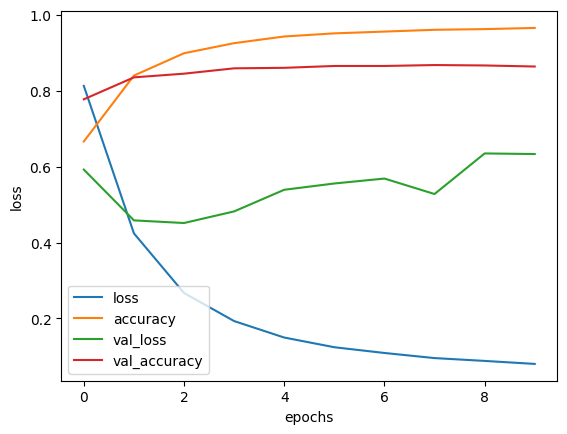

In [ ]:
pd.DataFrame(history_model_gru.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

# using Bi-directional RNN with LSTM

In [ ]:
#model construction -
tf.random.set_seed(42)
model_embedding_BRNN = layers.Embedding(
    input_dim = max_vocab_length,
    output_dim =512,
    embeddings_initializer="uniform",
    input_length = max_length,
    name = "BRNN_embedding"

)
inputs = layers.Input(shape=(1,),dtype = "string")
x = text_vectorizer(inputs)
x = model_embedding_BRNN(x)



x = layers.Bidirectional(layers.LSTM(64,return_sequences = True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

x = layers.Dense(256,activation="relu")(x)
x = layers.Dense(128,activation="relu")(x)


outputs = layers.Dense(4,activation="softmax")(x)

model_brnn = tf.keras.Model(inputs,outputs,name = "model-brnn")


In [ ]:
model_brnn.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics = ["accuracy"]
)

In [ ]:
history_model_brnn = model_brnn.fit(train_sentences,train_labels,epochs = 10,
                                    validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "brnn")])

Saving TensorBoard log files to: model_logs/brnn/20240601-135511
Epoch 1/10
1850/1850 [==============================] - 48s 22ms/step - loss: 0.9005 - accuracy: 0.6235 - val_loss: 0.7379 - val_accuracy: 0.7083
Epoch 2/10
1850/1850 [==============================] - 31s 17ms/step - loss: 0.6163 - accuracy: 0.7652 - val_loss: 0.6151 - val_accuracy: 0.7657
Epoch 3/10
1850/1850 [==============================] - 33s 18ms/step - loss: 0.4466 - accuracy: 0.8366 - val_loss: 0.4942 - val_accuracy: 0.8178
Epoch 4/10
1850/1850 [==============================] - 31s 17ms/step - loss: 0.3343 - accuracy: 0.8806 - val_loss: 0.4721 - val_accuracy: 0.8316
Epoch 5/10
1850/1850 [==============================] - 33s 18ms/step - loss: 0.2544 - accuracy: 0.9090 - val_loss: 0.4337 - val_accuracy: 0.8504
Epoch 6/10
1850/1850 [==============================] - 30s 16ms/step - loss: 0.2025 - accuracy: 0.9272 - val_loss: 0.4803 - val_accuracy: 0.8551
Epoch 7/10
1850/1850 [==============================] - 30s

Text(0, 0.5, 'loss')

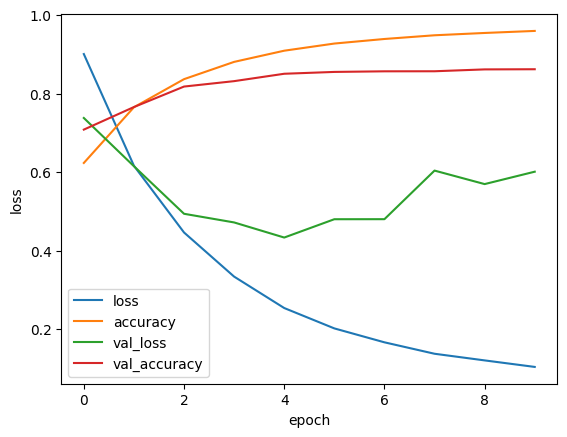

In [ ]:
pd.DataFrame(history_model_brnn.history).plot()
plt.xlabel("epoch")
plt.ylabel("loss")

## using transfer learning - accessing a pretrained word embedding.

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
model_transfer = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(256, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(4, activation="softmax")
], name="model_transfer")

model_transfer.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_6_history = model_transfer.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240601-140715
Epoch 1/10
1850/1850 [==============================] - 39s 18ms/step - loss: 0.4201 - accuracy: 0.5881 - val_loss: 0.3780 - val_accuracy: 0.6448
Epoch 2/10
1850/1850 [==============================] - 33s 18ms/step - loss: 0.3392 - accuracy: 0.6935 - val_loss: 0.3237 - val_accuracy: 0.7123
Epoch 3/10
1850/1850 [==============================] - 36s 20ms/step - loss: 0.2549 - accuracy: 0.7852 - val_loss: 0.2831 - val_accuracy: 0.7561
Epoch 4/10
1850/1850 [==============================] - 31s 17ms/step - loss: 0.1897 - accuracy: 0.8471 - val_loss: 0.2587 - val_accuracy: 0.7817
Epoch 5/10
1850/1850 [==============================] - 38s 21ms/step - loss: 0.1446 - accuracy: 0.8844 - val_loss: 0.2595 - val_accuracy: 0.7938
Epoch 6/10
1850/1850 [==============================] - 33s 18ms/step - loss: 0.1142 - accuracy: 0.9094 - val_loss: 0.2665 - val_accuracy: 0.8031
Epoch 7/10
1850/1850 [==================